<a href="https://colab.research.google.com/github/mrhamedani/Deep-learning-projects-Tensorflow/blob/main/4_cifar10_ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() # datset show image(car, dog, cat, etc) and label for each image - classification
x_train= x_train / 255.0
x_test=  x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


**Convolutional Layers in CNN: Conv2D & MaxPooling2D**

**Conv2D Layer**

Conv2D is a convolutional layer that applies filters (kernels) to an input image to extract spatial features like edges and textures.

*How it works?*

A small filter (kernel) slides over the input image.

Performs element-wise multiplication and sums up values.

Outputs a feature map capturing key patterns.

*Key Parameters:*

filters: Number of feature detectors.

kernel_size: Size of the kernel (e.g., 3×3).

activation: Common choices include 'relu', 'sigmoid'.


**MaxPooling2D Layer**

MaxPooling2D reduces the spatial dimensions of a feature map while retaining important information, improving efficiency and reducing overfitting.

*How it works?*

A window (e.g., 2×2) moves over the feature map.

Max value from each window is kept.

Output is a smaller feature map.

*Key Parameters:*

pool_size: Window size (e.g., (2,2)).

strides: Step size (default: same as pool_size).



In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(32,32,3)),
  tf.keras.layers.Conv2D(filters= 6 , kernel_size= 5 ,activation='relu'), # filter size 5x5 & 6 filters
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(filters= 16 , kernel_size= 5, activation='relu'), # filter size 5x5 & 16 filters
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units= 120 , activation='relu'),
  tf.keras.layers.Dense(units= 84 , activation='relu'),
  tf.keras.layers.Dense(units= 10 , activation='softmax')]) # output 10 classes  # softmax is for classification


model.compile(optimizer= 'adam' , loss= 'categorical_crossentropy' , metrics= ['accuracy'])

In [8]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10) # utilize one hot encoding
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [11]:
history = model.fit(x_train, y_train_one_hot, epochs=10, validation_data=(x_test, y_test_one_hot))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.4753 - loss: 1.4487 - val_accuracy: 0.5315 - val_loss: 1.3094
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.5407 - loss: 1.2891 - val_accuracy: 0.5505 - val_loss: 1.2554
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.5716 - loss: 1.2055 - val_accuracy: 0.5644 - val_loss: 1.2204
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.5991 - loss: 1.1344 - val_accuracy: 0.5669 - val_loss: 1.2055
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6178 - loss: 1.0758 - val_accuracy: 0.5811 - val_loss: 1.1758
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.6341 - loss: 1.0348 - val_accuracy: 0.5835 - val_loss: 1.2084
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.6500 - loss: 0.9852 - val_accuracy: 0.5971 - val_loss: 1.1462
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.6655 -

Text(0, 0.5, 'Accuracy')

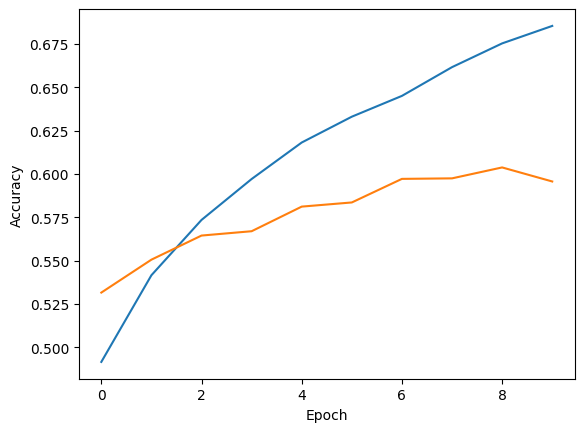

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')